In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt #use to display image
import os
import cv2 # to do image operations

In [2]:
DATADIR = 'sharks'
CATEGORIES = [
              'basking', 
              'blacktip', 
              'blue', 
              'bull', 
              'hammerhead', 
              'lemon', 
              'mako',
              'nurse',
              'sand tiger',
              'thresher',
              'tiger',
              'whale',
              'white',
              'whitetip' 
]

In [3]:
IMG_SIZE = 50

In [4]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # enter shark species dir
    class_num = CATEGORIES.index(category)
    # loop through images in dir
    for img in os.listdir(path):
      try:
        # convert image to array
        img_array = cv2.imread(os.path.join(path, img)) #exact path of the image
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [9]:
len(training_data)

1546

In [10]:
import random
random.shuffle(training_data)

In [11]:
X = [] # 2D array, [[feature, label]]
y = []

In [12]:
for features, label in training_data:
  X.append(features)
  y.append(label)

# we need to convert into numpy array for it to work with tf
X = np.array(X)
y = np.array(y)


In [13]:
X.shape

(1546, 50, 50, 3)

In [14]:
import pickle
# save our training data to pickle file

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

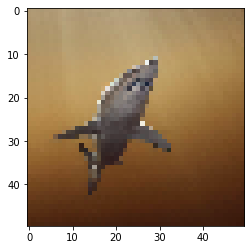

In [15]:
plt.imshow(X[0])

In [16]:
y[0]

6

In [17]:
# normalize data

X = X / 255.0

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, shuffle=True)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
78/78 [==============================] - 2s 19ms/step - loss: 2.5884 - accuracy: 0.1108
Epoch 2/10
78/78 [==============================] - 2s 19ms/step - loss: 2.4078 - accuracy: 0.1837
Epoch 3/10
78/78 [==============================] - 2s 30ms/step - loss: 2.2439 - accuracy: 0.2549
Epoch 4/10
78/78 [==============================] - 3s 37ms/step - loss: 2.1262 - accuracy: 0.3099
Epoch 5/10
78/78 [==============================] - 3s 35ms/step - loss: 1.9306 - accuracy: 0.3633
Epoch 6/10
78/78 [==============================] - 3s 35ms/step - loss: 1.7946 - accuracy: 0.3908
Epoch 7/10
78/78 [==============================] - 3s 37ms/step - loss: 1.6145 - accuracy: 0.4830
Epoch 8/10
78/78 [==============================] - 3s 36ms/step - loss: 1.4302 - accuracy: 0.5429
Epoch 9/10
78/78 [==============================] - 3s 35ms/step - loss: 1.2675 - accuracy: 0.5882
Epoch 10/10
78/78 [==============================] - 3s 35ms/step - loss: 1.0884 - accuracy: 0.6586


In [21]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 15ms/step - loss: 2.4360 - accuracy: 0.3161


[2.4359588623046875, 0.31612902879714966]

In [22]:
# Keras imports (from Tensorflow) - we are using Tensorflow's implementation of Keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS, NUM_CLASSES = 50, 50, 3, 14

"""
builds the base Keras model, without any regularization
"""
K.clear_session()
    
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
adam = Adam(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=adam,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
39/39 [==============================] - 39s 976ms/step - loss: 2.6139 - accuracy: 0.2217
Epoch 2/5
39/39 [==============================] - 39s 988ms/step - loss: 1.0912 - accuracy: 0.7095
Epoch 3/5
39/39 [==============================] - 38s 980ms/step - loss: 0.3967 - accuracy: 0.9482
Epoch 4/5
39/39 [==============================] - 36s 924ms/step - loss: 0.1225 - accuracy: 0.9976
Epoch 5/5
39/39 [==============================] - 36s 923ms/step - loss: 0.0550 - accuracy: 1.0000


In [23]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 3s 236ms/step - loss: 2.7646 - accuracy: 0.1226


[2.7645552158355713, 0.1225806474685669]